### Project 5

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [2]:
heart_desiease = pd.read_csv("framingham.csv")

In [3]:
heart_desiease.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
heart_desiease.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [5]:
heart_desiease.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
heart_desiease.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
heart_desiease.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


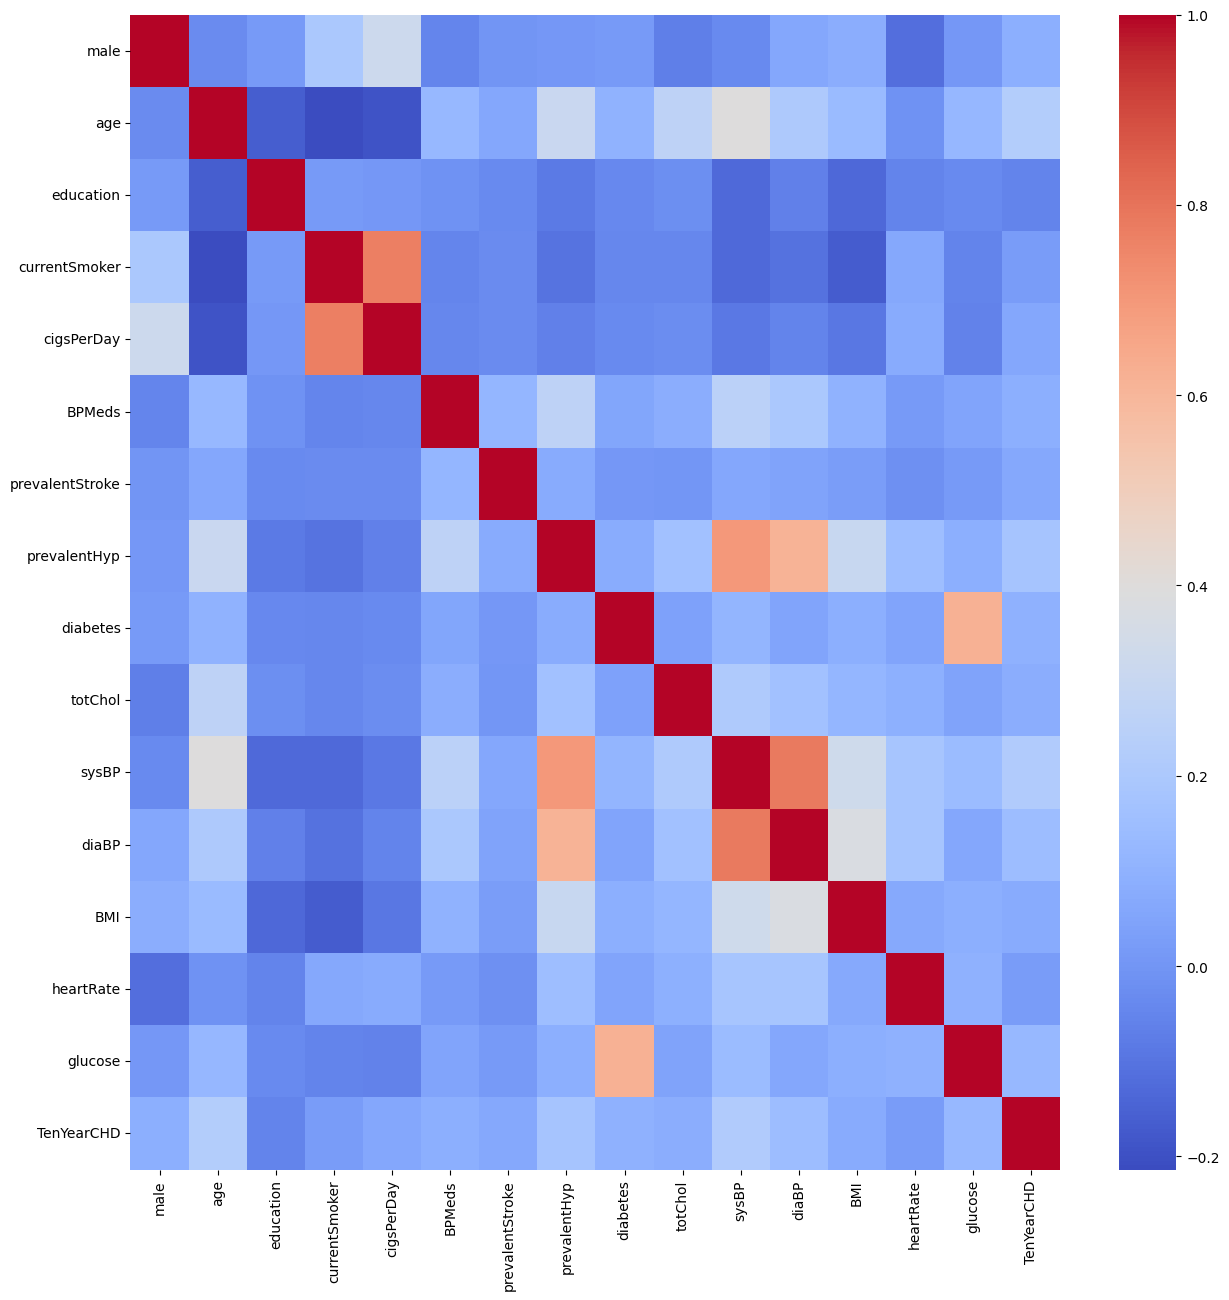

In [8]:

plt.figure(figsize=(15, 15))
sns.heatmap(heart_desiease.corr(), cmap="coolwarm")
plt.show()

In [9]:
heart_desiease_chd = heart_desiease
heart_desiease_chd.dropna(subset = ["cigsPerDay","glucose"], inplace= True)
heart_desiease_chd = heart_desiease_chd[['TenYearCHD']] 
heart_desiease = heart_desiease[["currentSmoker", "cigsPerDay", "prevalentHyp", "diabetes","sysBP","diaBP", "glucose"]]

In [10]:
heart_desiease.head()

,currentSmoker,cigsPerDay,prevalentHyp,diabetes,sysBP,diaBP,glucose
0,0,0.0,0,0,106.0,70.0,77.0
1,0,0.0,0,0,121.0,81.0,76.0
2,1,20.0,0,0,127.5,80.0,70.0
3,1,30.0,1,0,150.0,95.0,103.0
4,1,23.0,0,0,130.0,84.0,85.0


In [11]:
heart_desiease.isna().sum()

currentSmoker    0
cigsPerDay       0
prevalentHyp     0
diabetes         0
sysBP            0
diaBP            0
glucose          0
dtype: int64

In [12]:
heart_desiease.dropna(subset = ["cigsPerDay","glucose"], inplace= True)

In [13]:
heart_desiease.isna().sum()


currentSmoker    0
cigsPerDay       0
prevalentHyp     0
diabetes         0
sysBP            0
diaBP            0
glucose          0
dtype: int64

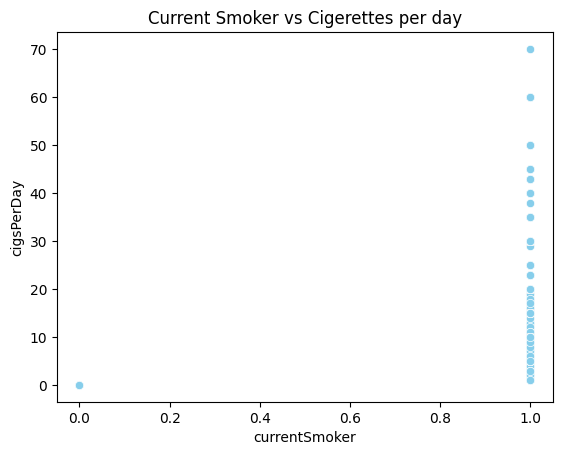

In [14]:
sns.scatterplot(x='currentSmoker', y='cigsPerDay', data= heart_desiease, color='skyblue')
plt.title('Current Smoker vs Cigerettes per day')
plt.show()

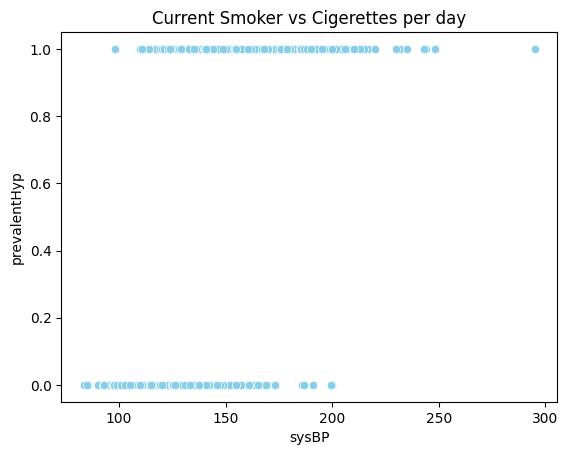

In [15]:
sns.scatterplot(x='sysBP', y='prevalentHyp', data= heart_desiease, color='skyblue')
plt.title('Current Smoker vs Cigerettes per day')
plt.show()

<Axes: xlabel='currentSmoker', ylabel='count'>

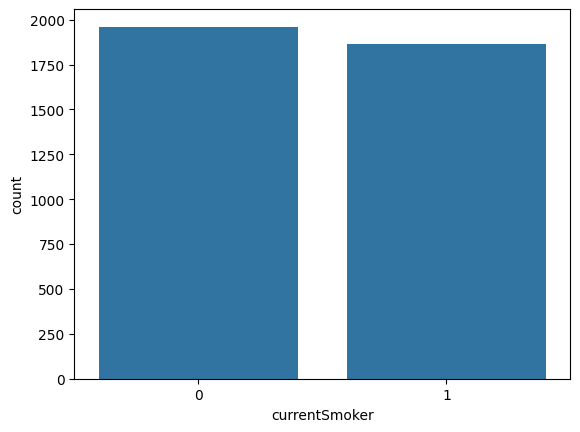

In [16]:
sns.countplot(x= "currentSmoker", data=heart_desiease)

<Axes: xlabel='cigsPerDay', ylabel='count'>

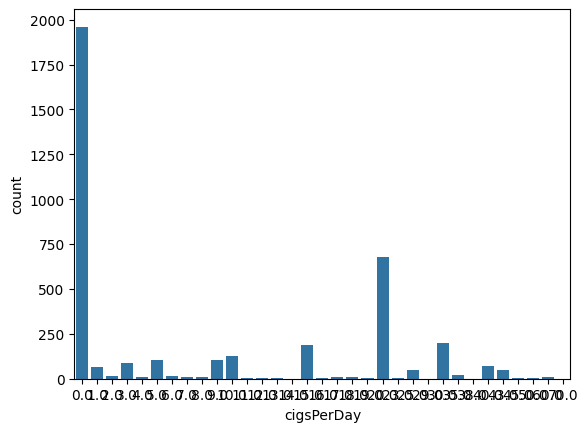

In [17]:
sns.countplot(x= "cigsPerDay", data=heart_desiease)

<Axes: xlabel='prevalentHyp', ylabel='count'>

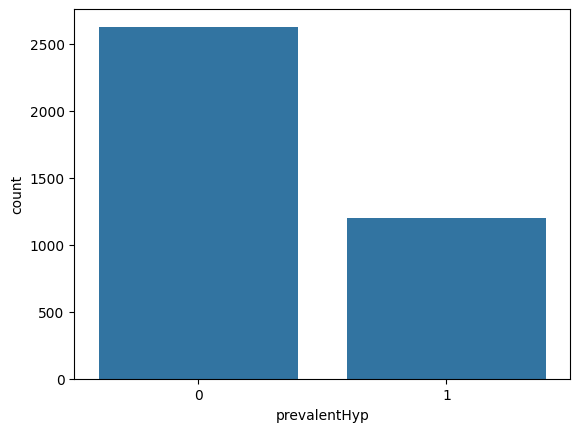

In [18]:
sns.countplot(x= "prevalentHyp", data=heart_desiease)

<Axes: xlabel='diabetes', ylabel='count'>

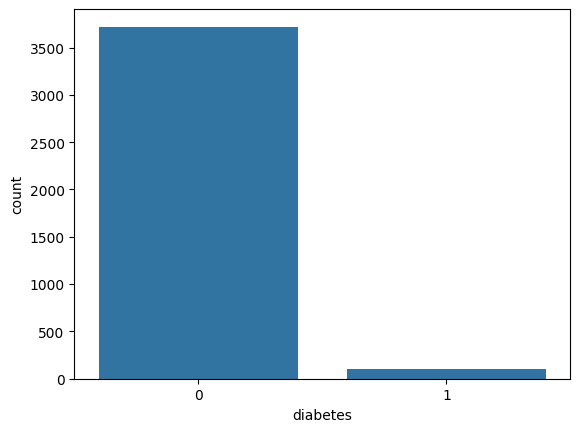

In [19]:
sns.countplot(x= "diabetes", data=heart_desiease)

<Axes: xlabel='sysBP', ylabel='count'>

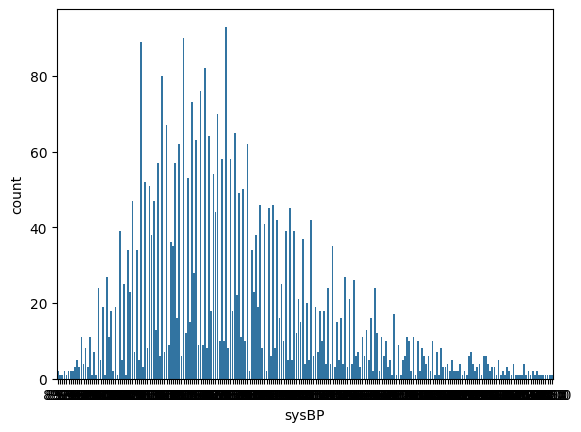

In [20]:
sns.countplot(x= "sysBP", data=heart_desiease)

<Axes: xlabel='diaBP', ylabel='count'>

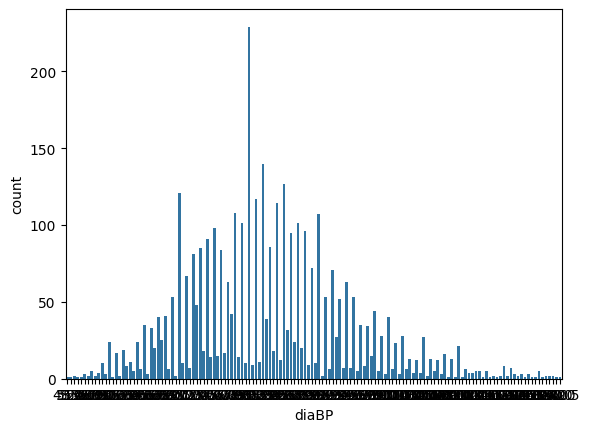

In [21]:
sns.countplot(x= "diaBP", data=heart_desiease)

<Axes: xlabel='glucose', ylabel='count'>

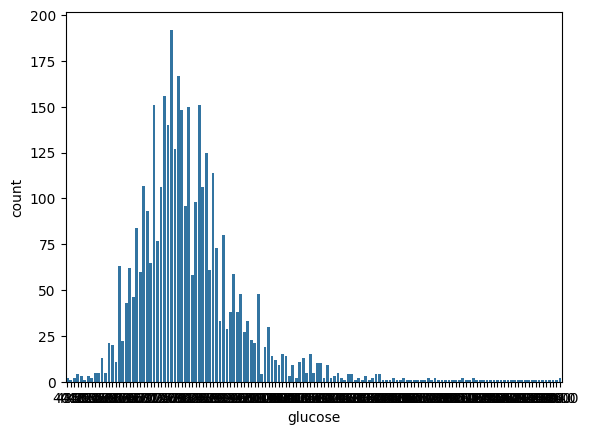

In [22]:
sns.countplot(x= "glucose", data=heart_desiease)

In [23]:
from math import sqrt
from sklearn import metrics

X = heart_desiease
y = heart_desiease_chd
x_train, x_test, y_train, y_test = train_test_split(X, y)
lr = linear_model.LogisticRegression() 
lr.fit(x_train, y_train)
print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)
y_pred = lr.predict(x_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Sqaured Error: ",mse)
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
r2 = metrics.r2_score(y_test, y_pred)
print("R2: ", r2)

Coefficients: 
 [[-0.20299993  0.02389214  0.38146545  0.59412047  0.01915976 -0.0084457
   0.00600061]]
Intercept: 
 [-4.39212989]
Mean Sqaured Error:  0.15047021943573669
Mean Absolute Error: 0.15047021943573669
R2:  -0.13843866171003727


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


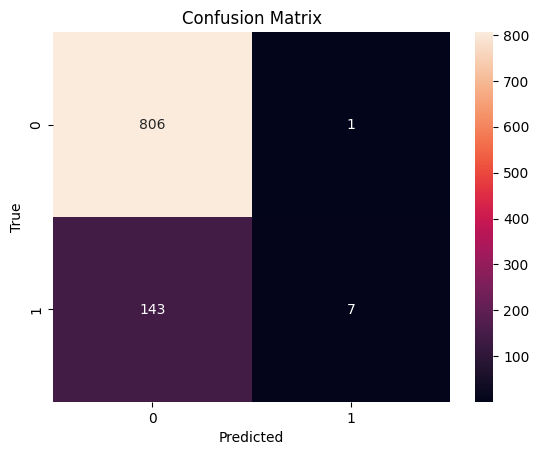

In [30]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

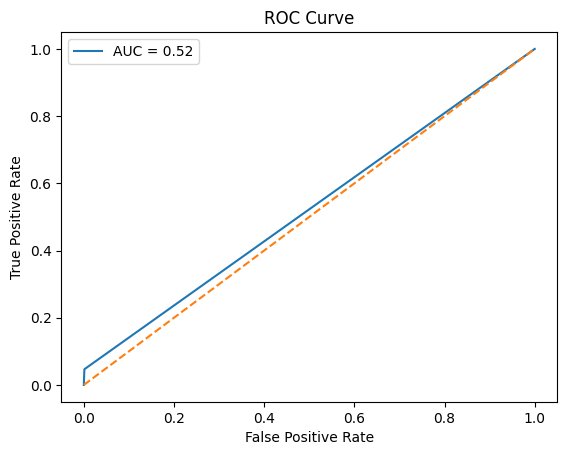

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

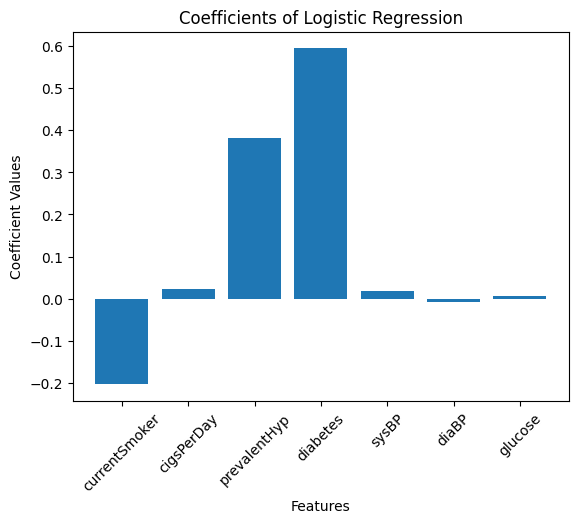

In [26]:
coef_values = lr.coef_[0]
feature_names = X.columns

plt.bar(feature_names, coef_values)
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.title('Coefficients of Logistic Regression')
plt.xticks(rotation=45)
plt.show()